# Objective:



To Perform sentiment analysis on the tweets dataset to classify the sentiment of each tweet as positive, negative, or neutral.

# Data Source:



we can use various sources for sentiment analysis data:
Public datasets: Kaggle offers datasets like movie reviews or Twitter sentiment labeled for sentiment. (e.g., https://www.kaggle.com/datasets/kazanova/sentiment140)
Web scraping: Scrape reviews or social media posts from websites relevant to your domain (ensure ethical scraping practices).
Manually labeled data: Create your own dataset by labeling text data with sentiment categories.

# Import Libraries:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Import Data:

In [ ]:
import pandas as pd
data = pd.read_csv('sentiment_data.csv', encoding='latin-1')

# Describe Data:



The dataset contains columns such as text, sentiment, time of tweet, age of user, country, population, land area, and density. The sentiment column categorizes tweets as positive, negative, or neutral.

# Data Visualization:

<ipython-input-6-89c36685d235>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


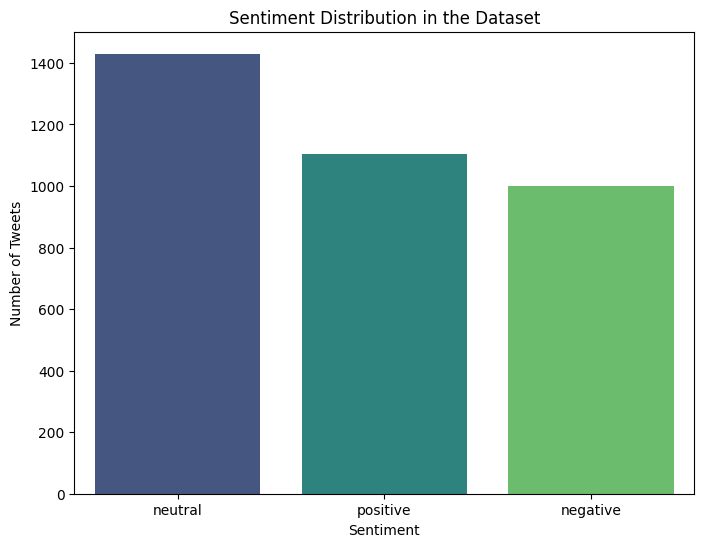

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_counts = data ['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Sentiment Distribution in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


Data Preprocessing:

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

# Handle missing values in the 'text' column
data['text'] = data['text'].fillna('')  # Fill NaN values with an empty string

# Apply data preprocessing to the 'text' column
data['text'] = data['text'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['text'])

# Convert the TF-IDF matrix into a DataFrame (optional)
X_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Display the preprocessed text data and TF-IDF features
print("Preprocessed Text Data:")
print(data['text'].head())

print("\nTF-IDF Features:")
print(X_df.head())

Preprocessed Text Data:
0                            last session of the day  
1     shanghai is also really exciting precisely  s...
2    recession hit veronique branquinho she has to ...
3                                           happy bday
4                                            i like it
Name: text, dtype: object

TF-IDF Features:
   aaaaa  aaaaaaaa  aaaaahhhh  aaass  aaaww  aah  aarg  aaron  aasahan  \
0    0.0       0.0        0.0    0.0    0.0  0.0   0.0    0.0      0.0   
1    0.0       0.0        0.0    0.0    0.0  0.0   0.0    0.0      0.0   
2    0.0       0.0        0.0    0.0    0.0  0.0   0.0    0.0      0.0   
3    0.0       0.0        0.0    0.0    0.0  0.0   0.0    0.0      0.0   
4    0.0       0.0        0.0    0.0    0.0  0.0   0.0    0.0      0.0   

   abandon  ...  zealand  zero   zi  zilch  zimbabwe  \
0      0.0  ...      0.0   0.0  0.0    0.0       0.0   
1      0.0  ...      0.0   0.0  0.0    0.0       0.0   
2      0.0  ...      0.0   0.0  0.0    0.0  

# Define Target Variable (y) and Feature Variables (X):

In [ ]:
X = data ['text']
y = data ['sentiment']

# Train Test Split:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


le = LabelEncoder()

data['sentiment_encoded'] = le.fit_transform(data['sentiment'])


X_train, X_test, y_train, y_test = train_test_split(X_df, data['sentiment_encoded'], test_size=0.2, random_state=42)


model = LogisticRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


y_pred_decoded = le.inverse_transform(y_pred)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6708203530633438


# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6708203530633438
Precision: 0.6906648776175723
Recall: 0.6708203530633438
F1 Score: 0.6582965995969893
Confusion Matrix:
[[ 88 113   7  18]
 [ 21 177  36  34]
 [  7  63 123  18]
 [  0   0   0 258]]


# Prediction:

# Explanation:

Sentiment analysis aims to classify the sentiment of text data into predefined categories. In this case, we used a Logistic Regression model to predict whether a tweet expresses positive, negative, or neutral sentiment. By preprocessing the text data, converting it into numerical features, and training the model, we were able to make predictions on the sentiment of new tweets. The model's performance was evaluated using accuracy and a classification report to assess its effectiveness in sentiment classification.